In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

In [34]:
def check_nan(df: pd.DataFrame) -> None:
    
    """Recibe un dataframe y enseña % de valores nulos y la grafica"""
    
    nan_cols = df.isna().mean()  * 100  # porcentaje de nulo en cada columna

    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    # grafico de nulos en el dataframe
    plt.figure(figsize=(5, 3))  # inicia la figura y establece el tamaño

    sns.heatmap(df.isna(),   # datos
                yticklabels=False,
                cmap='viridis',
                cbar=False
               )

    plt.show();

**LECTURA Y LIMPIEZA CHAMPS**

In [15]:
champs = pd.read_csv('../data/lolworlds/wc_champions.csv')

champs.head()

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
0,0,Sylas,50,33,17,66.00%,39.37%,28,21,7,75.00%,22,12,10,54.55%,49,38.58%,99,77.95%
1,1,Sejuani,49,24,25,48.98%,38.58%,23,12,11,52.17%,26,12,14,46.15%,57,44.88%,106,83.46%
2,2,Azir,48,24,24,50.00%,37.80%,27,14,13,51.85%,21,10,11,47.62%,43,33.86%,91,71.65%
3,3,Aatrox,46,29,17,63.04%,36.22%,35,24,11,68.57%,11,5,6,45.45%,79,62.20%,125,98.43%
4,4,Aphelios,43,23,20,53.49%,33.86%,20,10,10,50.00%,23,13,10,56.52%,20,15.75%,63,49.61%


In [ ]:
# Nos encontramos un df muy limpio y con los valores casi preparados y apropiados para trabajar la visualización.

In [16]:
champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         108 non-null    int64 
 1   champion           108 non-null    object
 2   sum_total          108 non-null    int64 
 3   win_total          108 non-null    int64 
 4   lose_total         108 non-null    int64 
 5   winrate_total      108 non-null    object
 6   pick_rate          108 non-null    object
 7   sum_blue_side      108 non-null    int64 
 8   win_blue_side      108 non-null    int64 
 9   lose_blue_side     108 non-null    int64 
 10  winrate_blue_side  108 non-null    object
 11  sum_red_side       108 non-null    int64 
 12  win_red_side       108 non-null    int64 
 13  lose_red_side      108 non-null    int64 
 14  winrate_red_side   108 non-null    object
 15  sum_bans           108 non-null    int64 
 16  ban_rate           108 non-null    object
 1

In [ ]:
# Preparamos el dato para más tarde transformarlo a un valor numérico. 

In [17]:
champs.winrate_total = champs['winrate_total'].str.replace('%', '')
champs.pick_rate = champs['pick_rate'].str.replace('%', '')
champs.winrate_blue_side = champs['winrate_blue_side'].str.replace('%', '')
champs.winrate_red_side = champs['winrate_red_side'].str.replace('%', '')
champs.ban_rate = champs['ban_rate'].str.replace('%', '')
champs.pick_ban_rate = champs['pick_ban_rate'].str.replace('%', '')



In [18]:
champs.head()

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,pick_rate,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,sum_bans,ban_rate,sum_pick_ban,pick_ban_rate
0,0,Sylas,50,33,17,66.00,39.37,28,21,7,75.00,22,12,10,54.55,49,38.58,99,77.95
1,1,Sejuani,49,24,25,48.98,38.58,23,12,11,52.17,26,12,14,46.15,57,44.88,106,83.46
2,2,Azir,48,24,24,50.00,37.80,27,14,13,51.85,21,10,11,47.62,43,33.86,91,71.65
3,3,Aatrox,46,29,17,63.04,36.22,35,24,11,68.57,11,5,6,45.45,79,62.20,125,98.43
4,4,Aphelios,43,23,20,53.49,33.86,20,10,10,50.00,23,13,10,56.52,20,15.75,63,49.61


In [ ]:
# Nos encontramos con registros sin valor por lo que decidimos aplicar 0 para poder transformar el tipo de dato.

In [21]:
champs.winrate_blue_side = champs['winrate_blue_side'].str.replace('-', '0.00')
champs.winrate_red_side = champs['winrate_red_side'].str.replace('-', '0.00')

In [ ]:
# Transformamos el dato a float para poder manejarlo más fácilmente en Tableau.

In [22]:
champs.winrate_total = champs['winrate_total'].astype(float)
champs.pick_rate = champs['pick_rate'].astype(float)
champs.winrate_blue_side = champs['winrate_blue_side'].astype(float)
champs.winrate_red_side = champs['winrate_red_side'].astype(float)
champs.ban_rate = champs['ban_rate'].astype(float)
champs.pick_ban_rate = champs['pick_ban_rate'].astype(float)


**EXPORTAR DATOS CHAMPS**

In [24]:
champs.to_csv('../data/clean/champs.csv')

**LECTURA Y LIMPIEZA PLAYERS**

In [25]:
players = pd.read_csv('../data/lolworlds/wc_players_main.csv')

players.head()

,player,team,position,gold_per_minute,winrate,counter_pickrate,kills,deaths,assists,kda,kp,kill_share,share_team_deaths,first_blood_rate,gold_diff_10,xp_diff_10,cs_diff_10,cspm,share_team_deaths_15,damage_per_minute,share_damage,share_team_damage_15,average_gold_per_minute,gold_share,neutral_objectives_stolen,wards_per_minute,control_wards_per_minute,wards_cleared_per_minute
0,369,JD Gaming,Top,14,71%,57%,46,47,89,2.9,61.9%,21.1%,23.5%,21%,256,167,4.6,7.6,21.1%,594,25.1%,22.7%,265,21.6%,0,0.38,0.17,0.22
1,Abbedagge,100 Thieves,Middle,6,17%,67%,11,17,23,2.0,64.2%,20.8%,20.5%,17%,-193,-138,-5.5,8.5,26.4%,454,27.2%,29.4%,246,24.2%,0,0.42,0.17,0.17
2,Atlen,CTBC Flying Oyster,ADC,1,0%,100%,3,5,2,1.0,100.0%,60.0%,22.7%,100%,351,-595,4.0,7.9,23.0%,163,11.2%,8.5%,271,26.6%,0,0.38,0.16,0.41
3,Berserker,Cloud9,ADC,6,17%,83%,8,12,16,2.0,60.0%,20.0%,13.6%,33%,-476,54,-7.3,8.8,31.1%,389,22.2%,25.1%,246,25.9%,0,0.45,0.10,0.16
4,BeryL,DRX,Support,21,67%,57%,16,47,168,3.9,66.7%,5.8%,23.5%,19%,100,43,-0.5,1.0,3.6%,292,13.3%,11.7%,120,10.1%,0,1.64,0.46,0.41


In [ ]:
# Hacemos exactamente el mismo proceso con nuestro siguiente df.

In [26]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player                     82 non-null     object 
 1   team                       82 non-null     object 
 2   position                   82 non-null     object 
 3   gold_per_minute            82 non-null     int64  
 4   winrate                    82 non-null     object 
 5   counter_pickrate           82 non-null     object 
 6   kills                      82 non-null     int64  
 7   deaths                     82 non-null     int64  
 8   assists                    82 non-null     int64  
 9   kda                        82 non-null     float64
 10  kp                         82 non-null     object 
 11  kill_share                 82 non-null     object 
 12  share_team_deaths          82 non-null     object 
 13  first_blood_rate           82 non-null     object 
 

In [28]:
players.winrate = players['winrate'].str.replace('%', '')
players.counter_pickrate = players['counter_pickrate'].str.replace('%', '')
players.kp = players['kp'].str.replace('%', '')
players.kill_share = players['kill_share'].str.replace('%', '')
players.share_team_deaths = players['share_team_deaths'].str.replace('%', '')
players.first_blood_rate = players['first_blood_rate'].str.replace('%', '')
players.share_team_deaths_15 = players['share_team_deaths_15'].str.replace('%', '')
players.share_damage = players['share_damage'].str.replace('%', '')
players.share_team_damage_15 = players['share_team_damage_15'].str.replace('%', '')
players.gold_share = players['gold_share'].str.replace('%', '')

In [29]:
players.head()

,player,team,position,gold_per_minute,winrate,counter_pickrate,kills,deaths,assists,kda,kp,kill_share,share_team_deaths,first_blood_rate,gold_diff_10,xp_diff_10,cs_diff_10,cspm,share_team_deaths_15,damage_per_minute,share_damage,share_team_damage_15,average_gold_per_minute,gold_share,neutral_objectives_stolen,wards_per_minute,control_wards_per_minute,wards_cleared_per_minute
0,369,JD Gaming,Top,14,71,57,46,47,89,2.9,61.9,21.1,23.5,21,256,167,4.6,7.6,21.1,594,25.1,22.7,265,21.6,0,0.38,0.17,0.22
1,Abbedagge,100 Thieves,Middle,6,17,67,11,17,23,2.0,64.2,20.8,20.5,17,-193,-138,-5.5,8.5,26.4,454,27.2,29.4,246,24.2,0,0.42,0.17,0.17
2,Atlen,CTBC Flying Oyster,ADC,1,0,100,3,5,2,1.0,100.0,60.0,22.7,100,351,-595,4.0,7.9,23.0,163,11.2,8.5,271,26.6,0,0.38,0.16,0.41
3,Berserker,Cloud9,ADC,6,17,83,8,12,16,2.0,60.0,20.0,13.6,33,-476,54,-7.3,8.8,31.1,389,22.2,25.1,246,25.9,0,0.45,0.10,0.16
4,BeryL,DRX,Support,21,67,57,16,47,168,3.9,66.7,5.8,23.5,19,100,43,-0.5,1.0,3.6,292,13.3,11.7,120,10.1,0,1.64,0.46,0.41


In [30]:
players.winrate = players['winrate'].astype(float)
players.counter_pickrate = players['counter_pickrate'].astype(float)
players.kp = players['kp'].astype(float)
players.kill_share = players['kill_share'].astype(float)
players.share_team_deaths = players['share_team_deaths'].astype(float)
players.first_blood_rate = players['first_blood_rate'].astype(float)
players.share_team_deaths_15 = players['share_team_deaths_15'].astype(float)
players.share_damage = players['share_damage'].astype(float)
players.share_team_damage_15 = players['share_team_damage_15'].astype(float)
players.gold_share = players['gold_share'].astype(float)

In [31]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player                     82 non-null     object 
 1   team                       82 non-null     object 
 2   position                   82 non-null     object 
 3   gold_per_minute            82 non-null     int64  
 4   winrate                    82 non-null     float64
 5   counter_pickrate           82 non-null     float64
 6   kills                      82 non-null     int64  
 7   deaths                     82 non-null     int64  
 8   assists                    82 non-null     int64  
 9   kda                        82 non-null     float64
 10  kp                         82 non-null     float64
 11  kill_share                 82 non-null     float64
 12  share_team_deaths          82 non-null     float64
 13  first_blood_rate           82 non-null     float64
 

**EXPORTAR DATOS PLAYERS**

In [32]:
players.to_csv('../data/clean/players.csv')

**LECTURA Y LIMPIEZA TEAMS**

'N nan cols: 1'

elder_dragon_rate    50.0
dtype: float64

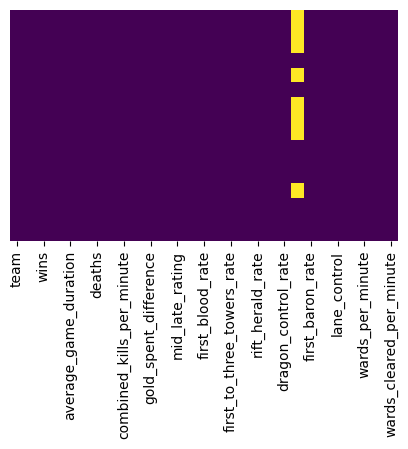

In [35]:
check_nan(teams)

In [41]:
teams = pd.read_csv('../data/lolworlds/wc_teams_main.csv')

teams.head()

,team,games_played,wins,loses,average_game_duration,kills,deaths,kd,combined_kills_per_minute,gold_percent_rating,gold_spent_difference,early_game_rating,mid_late_rating,gold_diff_15,first_blood_rate,first_tower_rate,first_to_three_towers_rate,turrent_plates_destroyed,rift_herald_rate,first_dragon_rate,dragon_control_rate,elder_dragon_rate,first_baron_rate,baron_control_rate,lane_control,jungle_control,wards_per_minute,control_wards_per_minute,wards_cleared_per_minute
0,100 Thieves,6,1,5,30.7,53,83,0.64,0.74,-1.05,-12.1%,43.6,-27.0,-732,33%,50%,33%,4.3,67%,33%,33%,NaN,33%,43%,47.8%,45.6%,3.04,1.18,1.34
1,Cloud9,6,1,5,27.2,40,88,0.45,0.78,-1.92,-15.5%,33.0,-16.4,-1957,50%,33%,17%,2.5,33%,50%,33%,NaN,17%,29%,48.1%,45.0%,2.58,0.79,0.99
2,CTBC Flying Oyster,6,1,5,31.7,48,118,0.41,0.87,-1.31,-9.9%,32.4,-15.7,-1300,67%,50%,17%,4.3,17%,50%,24%,NaN,33%,22%,49.9%,44.4%,3.29,1.25,1.32
3,DRX,21,14,7,34.5,276,200,1.38,0.66,0.68,4.4%,57.0,9.6,678,57%,62%,71%,4.5,62%,48%,53%,67%,67%,58%,50.4%,51.3%,3.63,1.54,1.82
4,DWG KIA,12,7,5,31.6,174,133,1.31,0.81,1.53,8.0%,74.4,-16.1,2262,42%,100%,83%,7.5,78%,58%,70%,NaN,75%,71%,48.9%,53.8%,3.59,1.47,1.44


In [ ]:
# Mismo proceso con el siguiente, con la única diferencia de que contiene valores nulos.
# Esto se debe a que no en todas las partidas ocurre que un equipo capture el monstruo neutral Elder Dragon.
# Decido rellenar con 0, aunque más adelante decidiré si utilizar esta columna en mi análisis.

In [42]:
teams.fillna(0., inplace = True)

In [43]:
teams.gold_spent_difference = teams['gold_spent_difference'].str.replace('%', '')
teams.first_blood_rate = teams['first_blood_rate'].str.replace('%', '')
teams.first_tower_rate = teams['first_tower_rate'].str.replace('%', '')
teams.first_to_three_towers_rate = teams['first_to_three_towers_rate'].str.replace('%', '')
teams.rift_herald_rate = teams['rift_herald_rate'].str.replace('%', '')
teams.first_dragon_rate = teams['first_dragon_rate'].str.replace('%', '')
teams.dragon_control_rate = teams['dragon_control_rate'].str.replace('%', '')
teams.elder_dragon_rate = teams['elder_dragon_rate'].str.replace('%', '')
teams.first_baron_rate = teams['first_baron_rate'].str.replace('%', '')
teams.baron_control_rate = teams['baron_control_rate'].str.replace('%', '')
teams.lane_control = teams['lane_control'].str.replace('%', '')
teams.jungle_control = teams['jungle_control'].str.replace('%', '')


In [44]:
teams.gold_spent_difference = teams['gold_spent_difference'].astype(float)
teams.first_blood_rate = teams['first_blood_rate'].astype(float)
teams.first_tower_rate = teams['first_tower_rate'].astype(float)
teams.first_to_three_towers_rate = teams['first_to_three_towers_rate'].astype(float)
teams.rift_herald_rate = teams['rift_herald_rate'].astype(float)
teams.first_dragon_rate = teams['first_dragon_rate'].astype(float)
teams.dragon_control_rate = teams['dragon_control_rate'].astype(float)
teams.elder_dragon_rate = teams['elder_dragon_rate'].astype(float)
teams.first_baron_rate = teams['first_baron_rate'].astype(float)
teams.baron_control_rate = teams['baron_control_rate'].astype(float)
teams.lane_control = teams['lane_control'].astype(float)
teams.jungle_control = teams['jungle_control'].astype(float)

In [45]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team                        16 non-null     object 
 1   games_played                16 non-null     int64  
 2   wins                        16 non-null     int64  
 3   loses                       16 non-null     int64  
 4   average_game_duration       16 non-null     float64
 5   kills                       16 non-null     int64  
 6   deaths                      16 non-null     int64  
 7   kd                          16 non-null     float64
 8   combined_kills_per_minute   16 non-null     float64
 9   gold_percent_rating         16 non-null     float64
 10  gold_spent_difference       16 non-null     float64
 11  early_game_rating           16 non-null     float64
 12  mid_late_rating             16 non-null     float64
 13  gold_diff_15                16 non-nu

**EXPORTAR DATOS TEAMS**

In [46]:
teams.to_csv('../data/clean/teams.csv')

In [48]:
teams.to_excel('../data/clean/teams.xlsx')

In [ ]:
# Exporto en formato excel ya que Tableau este df no lo reconocía correctamente en formato .csv